In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def show_plot(x, y=None, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    if np.all(y) == None:
        plt.plot(x)
    else:
        plt.plot(x, y)
    plt.grid()
    plt.show()

In [54]:
f1 = 750   # ГЦ
f2 = 1550  # ГЦ
fd1 = 15000 # ГЦ
fd2 = 3000  # ГЦ
fd3 = 30000 # ГЦ

Cформирован дискретный сигнал на интервале 1c

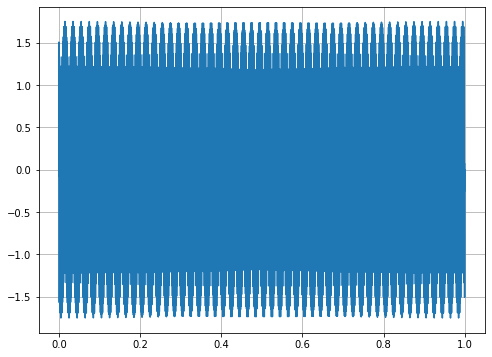

In [55]:
t = np.linspace(0, 1, fd1)

x = np.sin(2 * np.pi * f1 * t) + 0.75 * np.sin(2 * np.pi * f2 * t)

show_plot(t, x)

используя окно Хемминга построить спектр сигнал

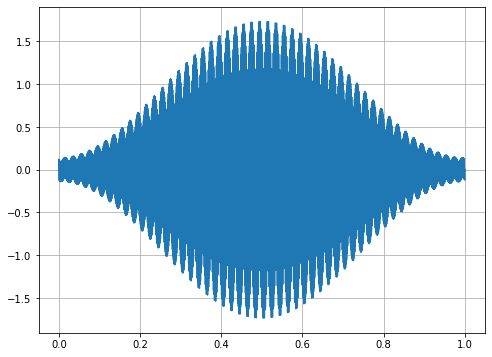

In [56]:
w = scipy.signal.hamming(fd1)
dw = x * w

show_plot(t, dw)

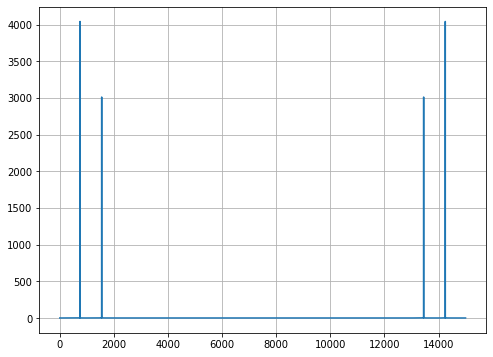

In [57]:
AmpSpec_dw = abs(np.fft.fft(dw)) 

show_plot(AmpSpec_dw)

задать новую частоту дискретизации fд'' и определить коэффициент децимации

In [58]:
dec = fd1 // fd2
dec

5

синтезировать ФНЧ ПНДС с помощью функции fir1

In [59]:
h = scipy.signal.firwin(20, 0.7)
h

array([ 0.00238175, -0.00061297, -0.00529706,  0.01391095, -0.01119023,
       -0.01850977,  0.06492429, -0.07645468, -0.03126936,  0.56211708,
        0.56211708, -0.03126936, -0.07645468,  0.06492429, -0.01850977,
       -0.01119023,  0.01391095, -0.00529706, -0.00061297,  0.00238175])

построить частотную характеристику синтезированного фильтра с помощью
БПФ

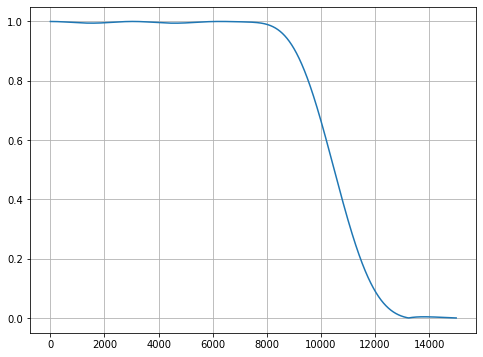

In [60]:
w, h1 = scipy.signal.freqz(h, 1, fd1)
show_plot(abs(h1))

реализовать ПНДС в соответствии с рис 5.5. Фильтрацию сигнала реализовать с использованием функции filter

In [61]:
d = scipy.signal.lfilter(h, 1, x)

In [62]:
i = np.arange(1, len(x), dec)
y = x[i]
len(y)

3000

используя окно Хеннинга построить спектр сигнала у

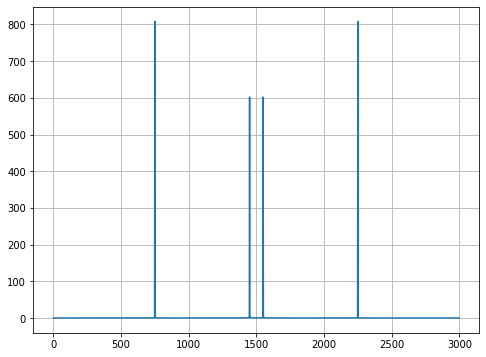

In [63]:
w = scipy.signal.hamming(len(y))
dw = y * w

show_plot(abs(np.fft.fft(dw)))

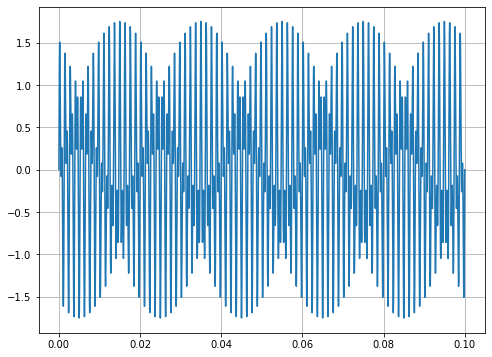

In [64]:
t = np.linspace(0, 0.1, fd1)

x = np.sin(2 * np.pi * f1 * t) + 0.75 * np.sin(2 * np.pi * f2 * t)
show_plot(t, x)

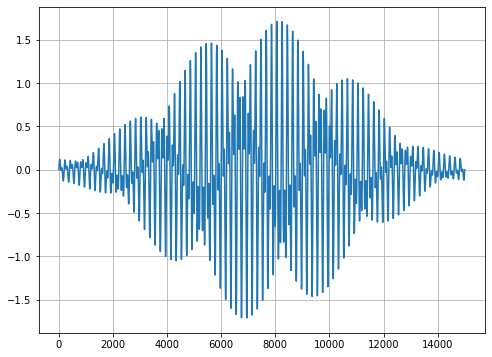

In [65]:
w = scipy.signal.hamming(fd1)
dw = x * w

show_plot(dw)

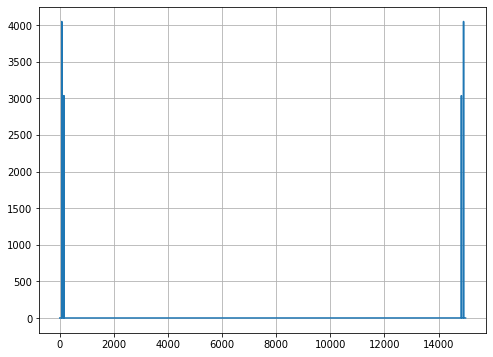

In [66]:
AmpSpec_dw = np.fft.fft(dw)
show_plot(abs(AmpSpec_dw))

In [67]:
inter = fd3 // fd1
inter

2

In [68]:
d = np.zeros(inter * len(x))
i = np.arange(0, len(d), inter)
d[i] = x

In [69]:
d.shape

(30000,)

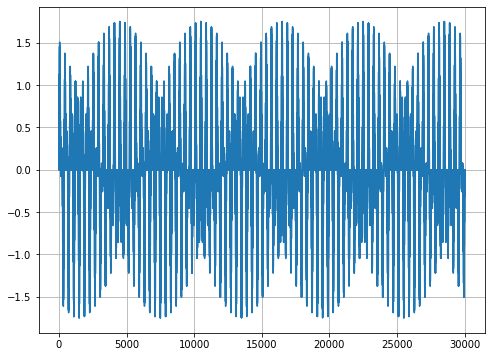

In [70]:
show_plot(d)

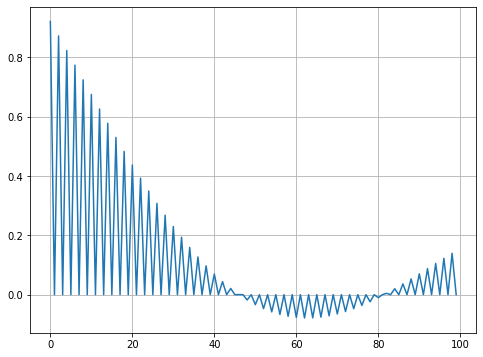

In [71]:
show_plot(d[100:200])

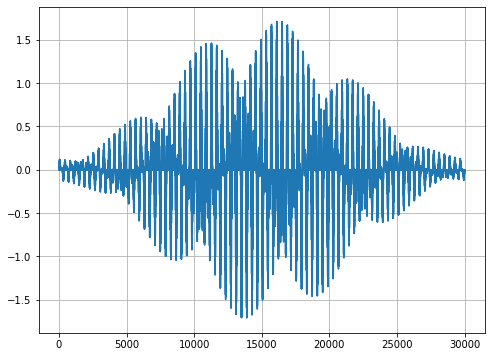

In [72]:
w = scipy.signal.hamming(len(d))
dw = d * w

show_plot(dw)

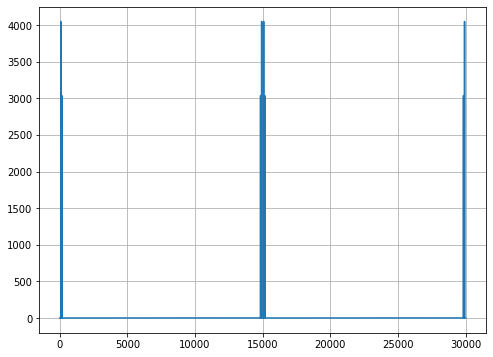

In [73]:
AmpSpec_dw = np.fft.fft(dw)

show_plot(abs(AmpSpec_dw))

In [74]:
h = scipy.signal.firwin(100, 0.7)

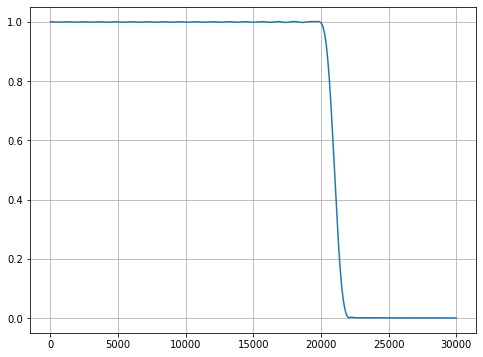

In [75]:
w,h1 = scipy.signal.freqz(h, 1, fd3)
show_plot(abs(h1))

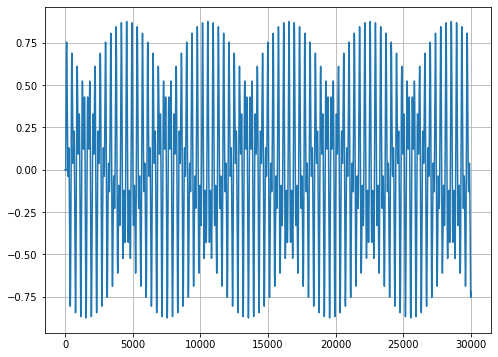

In [76]:
y = scipy.signal.lfilter(h, 1, d)
show_plot(y)

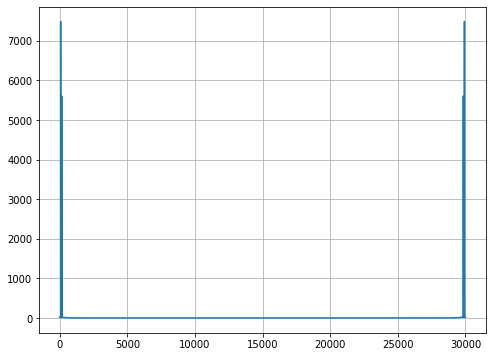

In [77]:
AmpSpec_y = np.fft.fft(y)
show_plot(abs(AmpSpec_y))